<h1> Crime Analysis - Toronto, CA <h1>

<h2> Link to Google Sheets <h2>

In [155]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from pprint import pprint # for better looking format when data is printed

from df2gspread import df2gspread as d2g # to export dataframes back to google sheets

In [2]:
scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/spreadsheets','https://www.googleapis.com/auth/drive.file','https://www.googleapis.com/auth/drive']

In [3]:
creds = ServiceAccountCredentials.from_json_keyfile_name("TO-Crime-viz-data-5dd7afd7e371.json", scope)
client = gspread.authorize(creds)

In [4]:
sheet_TO_neighbourhoods = client.open("TO_Neighbourhood_Data").worksheet('TO_Neighbourhoods') # Indicates the worksheet name to be opened
sheet_TO_FSA_coordinates = client.open("TO_Neighbourhood_Data").worksheet('Geospatial_Coordinates')
sheet_TO_crime_data = client.open("TO_Crime_Data").worksheet('TO_Crime_Data')

In [5]:
TO_neighbourhoods = sheet_TO_neighbourhoods.get_all_records()
TO_FSA_coordinates = sheet_TO_FSA_coordinates.get_all_records()
TO_crime_data = sheet_TO_crime_data.get_all_records()

In [6]:
# for better looking format when data is printed
pprint(TO_neighbourhoods)

ough', 'Neighbourhood': 'PortUnion', 'Postal Code': 'M1C'},
 {'Borough': 'Scarborough',
  'Neighbourhood': 'HighlandCreek',
  'Postal Code': 'M1C'},
 {'Borough': 'Etobicoke', 'Neighbourhood': 'Eringate', 'Postal Code': 'M9C'},
 {'Borough': 'Etobicoke',
  'Neighbourhood': 'BloordaleGardens',
  'Postal Code': 'M9C'},
 {'Borough': 'Etobicoke',
  'Neighbourhood': 'OldBurnhamthorpe',
  'Postal Code': 'M9C'},
 {'Borough': 'Etobicoke',
  'Neighbourhood': 'MarklandWood',
  'Postal Code': 'M9C'},
 {'Borough': 'Scarborough', 'Neighbourhood': 'Guildwood', 'Postal Code': 'M1E'},
 {'Borough': '', 'Neighbourhood': '', 'Postal Code': 'M2E'},
 {'Borough': '', 'Neighbourhood': '', 'Postal Code': 'M3E'},
 {'Borough': 'East Toronto',
  'Neighbourhood': 'TheBeaches',
  'Postal Code': 'M4E'},
 {'Borough': 'Downtown Toronto',
  'Neighbourhood': 'BerczyPark',
  'Postal Code': 'M5E'},
 {'Borough': 'York',
  'Neighbourhood': 'Caledonia-Fairbanks',
  'Postal Code': 'M6E'},
 {'Borough': '', 'Neighbourhood': '', 

<h2> Transforming Datasets into Dataframes <h2>

In [7]:
# Required Python libraries

# Library to handle data in a vectorized manner.
import numpy as np

# Library for data analysis.
import pandas as pd

In [8]:
# Imports Google sheet as pandas dataframe; 0 indicates first row/column

# Imports Toronto neighbourhood data per postal code into a dataframe called df_TO_Neighbourhoods.
df_TO_Neighbourhoods = pd.DataFrame(TO_neighbourhoods[0:], columns=TO_neighbourhoods[0])

# Imports Toronto latitude/longitude data for each postal code into a dataframe called df_TO_FSA_Location_Coordinates.
df_TO_FSA_Location_Coordinates = pd.DataFrame(TO_FSA_coordinates[0:], columns=TO_FSA_coordinates[0])

# Imports Toronto crime data into a dataframe called df_TO_Crime.
df_TO_Crime = pd.DataFrame(TO_crime_data[0:], columns=TO_crime_data[0])

In [9]:
# By default the first row will be considered as the header
df_TO_Neighbourhoods

,Postal Code,Borough,Neighbourhood
0,M1A,,
1,M2A,,
2,M3A,North York,Parkwoods
3,M4A,North York,VictoriaVillage
4,M5A,Downtown Toronto,RegentPark
...,...,...,...
281,M8Z,Etobicoke,TheQueenswayWest
282,M8Z,Etobicoke,SouthofBloor
283,M8Z,Etobicoke,KingswayParkSouthWest
284,M8Z,Etobicoke,RoyalYorkSouthWest


In [10]:
df_TO_FSA_Location_Coordinates

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


In [13]:
df_TO_Crime

,event_unique_id,occurrencedate,reporteddate,Location_Type,reportedyear,reportedmonth,reportedday,reporteddayofyear,reporteddayofweek,reportedhour,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,Crime_Type,Division,Hood_ID,Neighbourhood,Lat,Long
0,GO-20152165447,2015-12-18T03:58:00.000Z,2015-12-18T03:59:00.000Z,Commercial,2015,December,18,352,Friday,3,...,18,352,Friday,3,Assault,D14,79,University,43.656982,-79.405228
1,GO-20151417245,2015-08-15T21:45:00.000Z,2015-08-17T22:11:00.000Z,Commercial,2015,August,17,229,Monday,22,...,15,227,Saturday,21,Assault,D42,118,TamO'Shanter-Sullivan,43.778732,-79.307907
2,GO-20151421107,2015-08-16T16:00:00.000Z,2015-08-18T14:40:00.000Z,Apartment,2015,August,18,230,Tuesday,14,...,16,228,Sunday,16,Break and Enter,D43,137,Woburn,43.765942,-79.225029
3,GO-20152167714,2015-11-26T13:00:00.000Z,2015-12-18T13:38:00.000Z,Other,2015,December,18,352,Friday,13,...,26,330,Thursday,13,Break and Enter,D43,133,CentennialScarborough,43.778648,-79.140823
4,GO-20152169954,2015-12-18T19:50:00.000Z,2015-12-18T19:55:00.000Z,Commercial,2015,December,18,352,Friday,19,...,18,352,Friday,19,Assault,D55,61,Taylor-Massey,43.691235,-79.288361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206430,GO-2019336030,2019-02-21T23:00:00.000Z,2019-02-22T13:27:00.000Z,Outside,2019,February,22,53,Friday,13,...,21,52,Thursday,23,Auto Theft,D23,7,Willowridge-Martingrove-Richview,43.682293,-79.563538
206431,GO-2019336549,2019-02-21T00:01:00.000Z,2019-02-22T14:45:00.000Z,Commercial,2019,February,22,53,Friday,14,...,21,52,Thursday,0,Auto Theft,D55,70,SouthRiverdale,43.656227,-79.348709
206432,GO-2019187512,2019-01-30T12:30:00.000Z,2019-01-30T12:47:00.000Z,House,2019,January,30,30,Wednesday,12,...,30,30,Wednesday,12,Auto Theft,D23,1,WestHumber-Clairville,43.743992,-79.598869
206433,GO-2019336549,2019-02-21T00:01:00.000Z,2019-02-22T14:45:00.000Z,Commercial,2019,February,22,53,Friday,14,...,21,52,Thursday,0,Auto Theft,D55,70,SouthRiverdale,43.656227,-79.348709


In [25]:
# Filters dataframe to only include crime records from 2015-2019
start_date = "2015-01-01T00:00:00.000Z"
end_date = "2019-12-31T23:47:00.000Z"

after_start_date = df_TO_Crime["occurrencedate"] >= start_date
before_end_date = df_TO_Crime["occurrencedate"] <= end_date
between_two_dates = after_start_date & before_end_date
df_TO_Crime = df_TO_Crime.loc[between_two_dates] # Filtered dataframe

In [26]:
df_TO_Crime

,event_unique_id,occurrencedate,reporteddate,Location_Type,reportedyear,reportedmonth,reportedday,reporteddayofyear,reporteddayofweek,reportedhour,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,Crime_Type,Division,Hood_ID,Neighbourhood,Lat,Long
0,GO-20152165447,2015-12-18T03:58:00.000Z,2015-12-18T03:59:00.000Z,Commercial,2015,December,18,352,Friday,3,...,18,352,Friday,3,Assault,D14,79,University,43.656982,-79.405228
1,GO-20151417245,2015-08-15T21:45:00.000Z,2015-08-17T22:11:00.000Z,Commercial,2015,August,17,229,Monday,22,...,15,227,Saturday,21,Assault,D42,118,TamO'Shanter-Sullivan,43.778732,-79.307907
2,GO-20151421107,2015-08-16T16:00:00.000Z,2015-08-18T14:40:00.000Z,Apartment,2015,August,18,230,Tuesday,14,...,16,228,Sunday,16,Break and Enter,D43,137,Woburn,43.765942,-79.225029
3,GO-20152167714,2015-11-26T13:00:00.000Z,2015-12-18T13:38:00.000Z,Other,2015,December,18,352,Friday,13,...,26,330,Thursday,13,Break and Enter,D43,133,CentennialScarborough,43.778648,-79.140823
4,GO-20152169954,2015-12-18T19:50:00.000Z,2015-12-18T19:55:00.000Z,Commercial,2015,December,18,352,Friday,19,...,18,352,Friday,19,Assault,D55,61,Taylor-Massey,43.691235,-79.288361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206430,GO-2019336030,2019-02-21T23:00:00.000Z,2019-02-22T13:27:00.000Z,Outside,2019,February,22,53,Friday,13,...,21,52,Thursday,23,Auto Theft,D23,7,Willowridge-Martingrove-Richview,43.682293,-79.563538
206431,GO-2019336549,2019-02-21T00:01:00.000Z,2019-02-22T14:45:00.000Z,Commercial,2019,February,22,53,Friday,14,...,21,52,Thursday,0,Auto Theft,D55,70,SouthRiverdale,43.656227,-79.348709
206432,GO-2019187512,2019-01-30T12:30:00.000Z,2019-01-30T12:47:00.000Z,House,2019,January,30,30,Wednesday,12,...,30,30,Wednesday,12,Auto Theft,D23,1,WestHumber-Clairville,43.743992,-79.598869
206433,GO-2019336549,2019-02-21T00:01:00.000Z,2019-02-22T14:45:00.000Z,Commercial,2019,February,22,53,Friday,14,...,21,52,Thursday,0,Auto Theft,D55,70,SouthRiverdale,43.656227,-79.348709


<h2> Data Cleaning and Manipulation <h2>

In [27]:
# Drops specific columns.
df_TO_Crime.drop('occurrencedate', axis= 1, inplace= True)
df_TO_Crime.drop('reporteddate', axis= 1, inplace= True)
df_TO_Crime.drop('reportedyear', axis= 1, inplace= True)
df_TO_Crime.drop('reportedmonth', axis= 1, inplace= True)
df_TO_Crime.drop('reportedday', axis= 1, inplace= True)
df_TO_Crime.drop('reporteddayofyear', axis= 1, inplace= True)
df_TO_Crime.drop('reporteddayofweek', axis= 1, inplace= True)
df_TO_Crime.drop('reportedhour', axis= 1, inplace= True)
df_TO_Crime.drop('occurrencemonth', axis= 1, inplace= True)
df_TO_Crime.drop('occurrenceday', axis= 1, inplace= True)
df_TO_Crime.drop('occurrencedayofyear', axis= 1, inplace= True)
df_TO_Crime.drop('occurrencedayofweek', axis= 1, inplace= True)
df_TO_Crime.drop('occurrencehour', axis= 1, inplace= True)
df_TO_Crime.drop('Division', axis= 1, inplace= True)
df_TO_Crime.drop('event_unique_id', axis= 1, inplace= True)

# Displays the first 5 rows, number can be inserted into brackets to display more rows/records.
df_TO_Crime.head()

,Location_Type,occurrenceyear,Crime_Type,Hood_ID,Neighbourhood,Lat,Long
0,Commercial,2015,Assault,79,University,43.656982,-79.405228
1,Commercial,2015,Assault,118,TamO'Shanter-Sullivan,43.778732,-79.307907
2,Apartment,2015,Break and Enter,137,Woburn,43.765942,-79.225029
3,Other,2015,Break and Enter,133,CentennialScarborough,43.778648,-79.140823
4,Commercial,2015,Assault,61,Taylor-Massey,43.691235,-79.288361


In [28]:
# Renames columns.
df_TO_Crime = df_TO_Crime.rename(columns={"Hood_ID": "Neighbourhood_ID"})
df_TO_Crime = df_TO_Crime.rename(columns={"occurrenceyear": "Occurrence_Year"})
df_TO_Crime = df_TO_Crime.rename(columns={"Lat": "Latitude"})
df_TO_Crime = df_TO_Crime.rename(columns={"Long": "Longitude"})

In [29]:
# Indexes dataframe by neighbourhood, so that attribute is emphasized.
df_TO_Crime.set_index("Neighbourhood")

,Location_Type,Occurrence_Year,Crime_Type,Neighbourhood_ID,Latitude,Longitude
Neighbourhood,,,,,,
University,Commercial,2015,Assault,79,43.656982,-79.405228
TamO'Shanter-Sullivan,Commercial,2015,Assault,118,43.778732,-79.307907
Woburn,Apartment,2015,Break and Enter,137,43.765942,-79.225029
CentennialScarborough,Other,2015,Break and Enter,133,43.778648,-79.140823
Taylor-Massey,Commercial,2015,Assault,61,43.691235,-79.288361
...,...,...,...,...,...,...
Willowridge-Martingrove-Richview,Outside,2019,Auto Theft,7,43.682293,-79.563538
SouthRiverdale,Commercial,2019,Auto Theft,70,43.656227,-79.348709
WestHumber-Clairville,House,2019,Auto Theft,1,43.743992,-79.598869


In [30]:
# Left join both dataframes. This is done to include latitudes and longitudes of each Neighbourhood based on FSA/Postal Code.
df_TO_Location = pd.merge(df_TO_Neighbourhoods, df_TO_FSA_Location_Coordinates, on="Postal Code", how='left')

In [31]:
# Drops column with title "Unnamed".
df_TO_Location.drop(df_TO_Location.columns[df_TO_Location.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [32]:
df_TO_Location

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M1A,,,NaN,NaN
1,M2A,,,NaN,NaN
2,M3A,North York,Parkwoods,43.753259,-79.329656
3,M4A,North York,VictoriaVillage,43.725882,-79.315572
4,M5A,Downtown Toronto,RegentPark,43.654260,-79.360636
...,...,...,...,...,...
281,M8Z,Etobicoke,TheQueenswayWest,43.628841,-79.520999
282,M8Z,Etobicoke,SouthofBloor,43.628841,-79.520999
283,M8Z,Etobicoke,KingswayParkSouthWest,43.628841,-79.520999
284,M8Z,Etobicoke,RoyalYorkSouthWest,43.628841,-79.520999


In [33]:
# Cleans dataframe by dropping missing values in df_TO_Location dataframe.
df_TO_Location = df_TO_Location.dropna()

In [34]:
df_TO_Location

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
2,M3A,North York,Parkwoods,43.753259,-79.329656
3,M4A,North York,VictoriaVillage,43.725882,-79.315572
4,M5A,Downtown Toronto,RegentPark,43.654260,-79.360636
5,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
6,M6A,North York,LawrenceManor,43.718518,-79.464763
...,...,...,...,...,...
280,M8Z,Etobicoke,MimicoNW,43.628841,-79.520999
281,M8Z,Etobicoke,TheQueenswayWest,43.628841,-79.520999
282,M8Z,Etobicoke,SouthofBloor,43.628841,-79.520999
283,M8Z,Etobicoke,KingswayParkSouthWest,43.628841,-79.520999


<h1> Exploratory Data Analysis <h1>

In [35]:
# Provides descriptive statisitics for df_TO_Crime dataframe.
df_TO_Crime.describe()

,Neighbourhood_ID,Latitude,Longitude
count,173683.000000,173683.000000,173683.000000
mean,72.156889,43.707086,-79.395314
std,40.671426,0.052809,0.104078
min,1.000000,43.587093,-79.639267
25%,36.000000,43.660759,-79.471481
50%,76.000000,43.700653,-79.393593
75%,107.000000,43.751942,-79.321236
max,140.000000,43.850788,-79.123100


Note: 50% of the Toronto crime records in the dataframe during 2000-2019 time period occurred between 2015 incidents and 2018 incidents with the average amount of crime records reported around mid-2016.

In [36]:
# Indicates how many unique types of crime there are.
print('There are {} unique crime types.'.format(len(df_TO_Crime['Crime_Type'].unique())))

There are 5 unique crime types.


In [37]:
# Indicates how many unique types of location there are.
print('There are {} unique location types.'.format(len(df_TO_Crime['Location_Type'].unique())))

There are 5 unique location types.


In [38]:
# Indicates how many unique neighbourhoods there are by neighbourhood ID.
print('There are {} unique neighbourhood IDs.'.format(len(df_TO_Crime['Neighbourhood_ID'].unique())))

There are 140 unique neighbourhood IDs.


<h2> Distribution of crime in Toronto <h2>

Text(0, 0.5, 'Number of Crime Records')

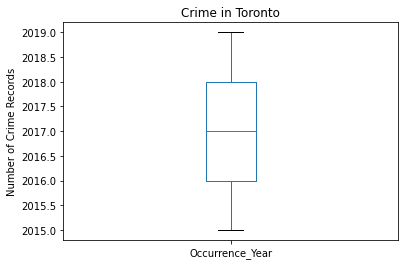

In [39]:
# Matplotlib and associated plotting modules.
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# Plots a box plot figure.
df_TO_Crime['Occurrence_Year'].plot(kind = 'box', showfliers=False)
plt.title('Crime in Toronto')
plt.ylabel('Number of Crime Records')

Note: The interquartile range is average amount of crime occurrences. Years below the interquartile range can be classified as years with lower crime and years above the interquartile range can be classified as years with high crime. These results are based on the datasets used.

In [97]:
# Map rendering library.
import folium 

import geopy

# Converts an address into latitude and longitude values.
from geopy.geocoders import Nominatim 

address = 'Toronto'

geolocator = Nominatim(user_agent="TO_Explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# Prints location data for the city of Toronto.
print('The geograpical coordinates of {} are {}, {}.'.format(address, latitude, longitude))

The geograpical coordinates of Toronto are 43.6534817, -79.3839347.


<h3> Neighbourhood map of Toronto <h3>

In [98]:
# Creates map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11) # Sets zoom level when map is outputted

# Adds markers to map by getting information from the df_TO_Location dataframe.
for lat, lng, Neighbourhood in zip(df_TO_Location['Latitude'], df_TO_Location['Longitude'], df_TO_Location['Neighbourhood']):
    # Label names for each marker.
    label = folium.Popup('Neighbourhood: ' + str(Neighbourhood), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        # popup label that appears when a marker is clicked on the map
        popup=label,
        # Colour of marker.
        color='blue',
        parse_html=False).add_to(map_toronto)  
    
map_toronto

<h2> Count of all crime types <h2> 

In [99]:
# Creates table to show count for each crime type.
crimetype_data = df_TO_Crime.groupby(['Crime_Type']).size().to_frame(name='Count').reset_index()
crimetype_data

,Crime_Type,Count
0,Assault,94214
1,Auto Theft,19845
2,Break and Enter,36036
3,Robbery,17914
4,Theft Over,5674


<AxesSubplot:ylabel='Crime_Type'>

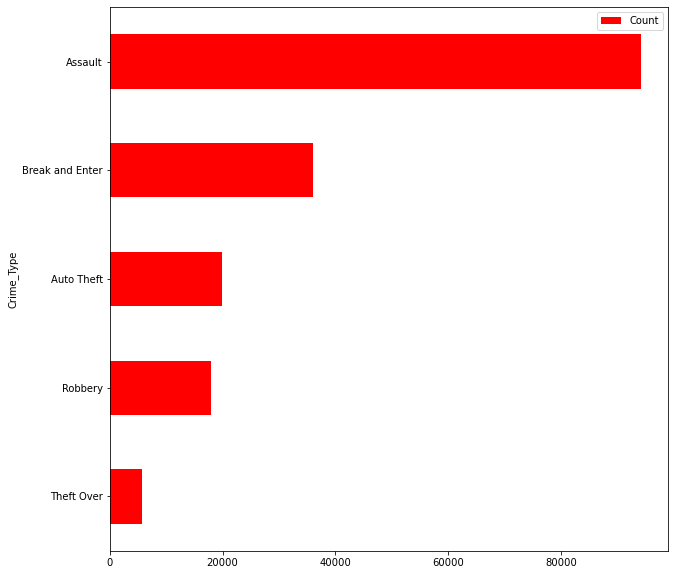

In [100]:
# Plots horizontal bar chart to show visualization of count per crime type from highest to lowest.
crimetype_data.sort_values('Count', inplace=True)
crimetype_data.plot(x='Crime_Type', y='Count', kind='barh', figsize=(10, 10), color='red')

<h2> CrossTab of crime records <h2> 

In [101]:
# Creates pivot table to show count of crime type per neighbourhood in Toronto.
crimepivot = df_TO_Crime.pivot_table(index='Neighbourhood', columns=['Crime_Type'], aggfunc=pd.Series.count, fill_value=0)
crimepivot

Latitude                                     \
Crime_Type                  Assault Auto Theft Break and Enter Robbery   
Neighbourhood                                                            
AgincourtNorth                  370        159             275     148   
AgincourtSouth-MalvernWest      581        187             406     139   
Alderwood                       170         87             124      36   
Annex                          1262        119             728     211   
Banbury-DonMills                417        112             372      77   
...                             ...        ...             ...     ...   
Wychwood                        367         74             172      66   
Yonge-Eglinton                  389         43             132     102   
Yonge-St.Clair                  163         24             103      28   
YorkUniversityHeights          1714        532             570     396   
Yorkdale-GlenPark               847        269             326     166   

                                      Location_Type             \
Crime_Type                 Theft Over       Assault Auto Theft   
Neighbourhood                                                    
AgincourtNorth                     27           370        159   
AgincourtSouth-MalvernWest         61           581        187   
Alderwood                          34           170         87   
Annex                             153          1262        119   
Banbury-DonMills                   51           417        112   
...                               ...           ...        ...   
Wychwood                           11           367         74   
Yonge-Eglinton                     23           389         43   
Yonge-St.Clair                     22           163         24   
YorkUniversityHeights             186          1714        532   
Yorkdale-GlenPark                 112           847        269   

                                                               ...  \
Crime_Type                 Break and Enter Robbery Theft Over  ...   
Neighbourhood                                                  ...   
AgincourtNorth                         275     148         27  ...   
AgincourtSouth-MalvernWest             406     139         61  ...   
Alderwood                              124      36         34  ...   
Annex                                  728     211        153  ...   
Banbury-DonMills                       372      77         51  ...   
...                                    ...     ...        ...  ...   
Wychwood                               172      66         11  ...   
Yonge-Eglinton                         132     102         23  ...   
Yonge-St.Clair                         103      28         22  ...   
YorkUniversityHeights                  570     396        186  ...   
Yorkdale-GlenPark                      326     166        112  ...   

                           Neighbourhood_ID                             \
Crime_Type                          Assault Auto Theft Break and Enter   
Neighbourhood                                                            
AgincourtNorth                          370        159             275   
AgincourtSouth-MalvernWest              581        187             406   
Alderwood                               170         87             124   
Annex                                  1262        119             728   
Banbury-DonMills                        417        112             372   
...                                     ...        ...             ...   
Wychwood                                367         74             172   
Yonge-Eglinton                          389         43             132   
Yonge-St.Clair                          163         24             103   
YorkUniversityHeights                  1714        532             570   
Yorkdale-GlenPark                       847        269             326   

                                              O

In [102]:
# Creates pivot table to show count of location type per neighbourhood in Toronto.
locationpivot = df_TO_Crime.pivot_table(index='Neighbourhood', columns=['Location_Type'], aggfunc=pd.Series.count, fill_value=0)
locationpivot

Crime_Type                                 \
Location_Type               Apartment Commercial House Other Outside   
Neighbourhood                                                          
AgincourtNorth                     65        144   444    75     251   
AgincourtSouth-MalvernWest        150        476   327    96     325   
Alderwood                          52        126   128    27     118   
Annex                             593        734   243   418     485   
Banbury-DonMills                  245        194   319    82     189   
...                               ...        ...   ...   ...     ...   
Wychwood                          122        152   125    84     207   
Yonge-Eglinton                     82        170    77   164     196   
Yonge-St.Clair                    125         66    46    19      84   
YorkUniversityHeights             794        978   308   371     947   
Yorkdale-GlenPark                 206        668   195   199     452   

                            Latitude                                 ...  \
Location_Type              Apartment Commercial House Other Outside  ...   
Neighbourhood                                                        ...   
AgincourtNorth                    65        144   444    75     251  ...   
AgincourtSouth-MalvernWest       150        476   327    96     325  ...   
Alderwood                         52        126   128    27     118  ...   
Annex                            593        734   243   418     485  ...   
Banbury-DonMills                 245        194   319    82     189  ...   
...                              ...        ...   ...   ...     ...  ...   
Wychwood                         122        152   125    84     207  ...   
Yonge-Eglinton                    82        170    77   164     196  ...   
Yonge-St.Clair                   125         66    46    19      84  ...   
YorkUniversityHeights            794        978   308   371     947  ...   
Yorkdale-GlenPark                206        668   195   199     452  ...   

                           Neighbourhood_ID                                 \
Location_Type                     Apartment Commercial House Other Outside   
Neighbourhood                                                                
AgincourtNorth                           65        144   444    75     251   
AgincourtSouth-MalvernWest              150        476   327    96     325   
Alderwood                                52        126   128    27     118   
Annex                                   593        734   243   418     485   
Banbury-DonMills                        245        194   319    82     189   
...                                     ...        ...   ...   ...     ...   
Wychwood                                122        152   125    84     207   
Yonge-Eglinton                           82        170    77   164     196   
Yonge-St.Clair                          125         66    46    19      84   
YorkUniversityHeights                   794        978   308   371     947   
Yorkdale-GlenPark                       206        668   195   199     452   

                           Occurrence_Year                                 
Location_Type                    Apartment Commercial House Other Outside  
Neighbourhood                                                              
AgincourtNorth                          65        144   444    75     251  
AgincourtSouth-MalvernWest             150        476   327    96     325  
Alderwood                               52        126   128    27     118  
Annex                                  593        734   243   418     485  
Banbury-DonMills                       245        194   319    82     189  
...                                    ...        ...   ...   ...     ...  
Wychwood                               122        152   125    84     207  
Yonge-Eglinton                          82        170    77   164     196  
Yonge-St.Clair          

<h2> Using 'One Hot' Encoding Python Technique <h2>

In [103]:
# Columns which contains numerical categorical data are split to many columns depending on the number of categories present in that column. 
# Each column contains '0' or '1' corresponding to which column it has been placed.

# Code is basically indicating the crime type and borough for each crime record.
onehot_crime = pd.get_dummies(df_TO_Crime[['Crime_Type']], prefix="", prefix_sep="")

# Adds neighbourhood column back to dataframe.
onehot_crime['Neighbourhood'] = df_TO_Crime['Neighbourhood'] 

<h2> Frequency of crime per Toronto neighbourhood <h2>

In [104]:
grouped_crime = onehot_crime.groupby('Neighbourhood').mean().reset_index()

# Note: The sum of all column values for each row is 1 (100%). The number in each cell represents relative frequency.
# Shows the proportion of each crime type that each neighbourhood witnessed.
grouped_crime

,Neighbourhood,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
0,AgincourtNorth,0.377937,0.162411,0.280899,0.151175,0.027579
1,AgincourtSouth-MalvernWest,0.422853,0.136099,0.295488,0.101164,0.044396
2,Alderwood,0.376940,0.192905,0.274945,0.079823,0.075388
3,Annex,0.510311,0.048120,0.294379,0.085321,0.061868
4,Banbury-DonMills,0.405248,0.108844,0.361516,0.074830,0.049563
...,...,...,...,...,...,...
135,Wychwood,0.531884,0.107246,0.249275,0.095652,0.015942
136,Yonge-Eglinton,0.564586,0.062409,0.191582,0.148041,0.033382
137,Yonge-St.Clair,0.479412,0.070588,0.302941,0.082353,0.064706
138,YorkUniversityHeights,0.504414,0.156563,0.167746,0.116539,0.054738


In [105]:
def return_most_common_Crime_Type(row, num_top_Crime_Type):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_Crime_Type]

<h2> Ranking the top 5 crime types by neighbourhood <h2>

In [106]:
top_Crime_Type = 5

# Adds the suffix for each number for each column title.
indicators = ['st', 'nd', 'rd']

# Creates columns according to number of top venues types.
columns = ['Neighbourhood']
for ind in np.arange(top_Crime_Type):
    try:
        columns.append('{}{} Most Common Type of Crime'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Type of Crime'.format(ind+1))

# Creates a new dataframe for top 5 common venues in each borough.
Neighbourhood_sorted_crime_type = pd.DataFrame(columns=columns)
Neighbourhood_sorted_crime_type['Neighbourhood'] = grouped_crime['Neighbourhood']

for ind in np.arange(grouped_crime.shape[0]):
    Neighbourhood_sorted_crime_type.iloc[ind, 1:] = return_most_common_Crime_Type(grouped_crime.iloc[ind, :], top_Crime_Type)

Neighbourhood_sorted_crime_type

,Neighbourhood,1st Most Common Type of Crime,2nd Most Common Type of Crime,3rd Most Common Type of Crime,4th Most Common Type of Crime,5th Most Common Type of Crime
0,AgincourtNorth,Assault,Break and Enter,Auto Theft,Robbery,Theft Over
1,AgincourtSouth-MalvernWest,Assault,Break and Enter,Auto Theft,Robbery,Theft Over
2,Alderwood,Assault,Break and Enter,Auto Theft,Robbery,Theft Over
3,Annex,Assault,Break and Enter,Robbery,Theft Over,Auto Theft
4,Banbury-DonMills,Assault,Break and Enter,Auto Theft,Robbery,Theft Over
...,...,...,...,...,...,...
135,Wychwood,Assault,Break and Enter,Auto Theft,Robbery,Theft Over
136,Yonge-Eglinton,Assault,Break and Enter,Robbery,Auto Theft,Theft Over
137,Yonge-St.Clair,Assault,Break and Enter,Robbery,Auto Theft,Theft Over
138,YorkUniversityHeights,Assault,Break and Enter,Auto Theft,Robbery,Theft Over


In [107]:
# Using 'One Hot' Encoding Python Technique on Location_Type

onehot_location = pd.get_dummies(df_TO_Crime[['Location_Type']], prefix="", prefix_sep="")

# Adds neighbourhood column back to dataframe.
onehot_location['Neighbourhood'] = df_TO_Crime['Neighbourhood'] 

In [108]:
grouped_location = onehot_location.groupby('Neighbourhood').mean().reset_index()

# Note: The sum of all column values for each row is 1 (100%). The number in each cell represents relative frequency.
# Shows the proportion of each crime type that each neighbourhood witnessed.
grouped_location

,Neighbourhood,Apartment,Commercial,House,Other,Outside
0,AgincourtNorth,0.066394,0.147089,0.453524,0.076609,0.256384
1,AgincourtSouth-MalvernWest,0.109170,0.346434,0.237991,0.069869,0.236536
2,Alderwood,0.115299,0.279379,0.283814,0.059867,0.261641
3,Annex,0.239790,0.296805,0.098261,0.169025,0.196118
4,Banbury-DonMills,0.238095,0.188533,0.310010,0.079689,0.183673
...,...,...,...,...,...,...
135,Wychwood,0.176812,0.220290,0.181159,0.121739,0.300000
136,Yonge-Eglinton,0.119013,0.246734,0.111756,0.238026,0.284470
137,Yonge-St.Clair,0.367647,0.194118,0.135294,0.055882,0.247059
138,YorkUniversityHeights,0.233667,0.287816,0.090642,0.109182,0.278693


In [109]:
def return_most_common_Location_Type(row, num_top_Location_Type):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_Location_Type]

<h2> Ranking the top 5 location types by neighbourhood <h2> 

In [110]:
top_Location_Type = 5

# Adds the suffix for each number for each column title.
indicators = ['st', 'nd', 'rd']

# Creates columns according to number of top venues types.
columns = ['Neighbourhood']
for ind in np.arange(top_Location_Type):
    try:
        columns.append('{}{} Most Common Type of Location'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Type of Location'.format(ind+1))

# Creates a new dataframe for top 5 common venues in each borough.
Neighbourhood_sorted_location_type = pd.DataFrame(columns=columns)
Neighbourhood_sorted_location_type['Neighbourhood'] = grouped_location['Neighbourhood']

for ind in np.arange(grouped_location.shape[0]):
    Neighbourhood_sorted_location_type.iloc[ind, 1:] = return_most_common_Location_Type(grouped_location.iloc[ind, :], top_Location_Type)

Neighbourhood_sorted_location_type

,Neighbourhood,1st Most Common Type of Location,2nd Most Common Type of Location,3rd Most Common Type of Location,4th Most Common Type of Location,5th Most Common Type of Location
0,AgincourtNorth,House,Outside,Commercial,Other,Apartment
1,AgincourtSouth-MalvernWest,Commercial,House,Outside,Apartment,Other
2,Alderwood,House,Commercial,Outside,Apartment,Other
3,Annex,Commercial,Apartment,Outside,Other,House
4,Banbury-DonMills,House,Apartment,Commercial,Outside,Other
...,...,...,...,...,...,...
135,Wychwood,Outside,Commercial,House,Apartment,Other
136,Yonge-Eglinton,Outside,Commercial,Other,Apartment,House
137,Yonge-St.Clair,Apartment,Outside,Commercial,House,Other
138,YorkUniversityHeights,Commercial,Outside,Apartment,Other,House


In [111]:
df_summary = pd.merge(grouped_crime, grouped_location, on="Neighbourhood", how='left')

<h1> K-Means Clustering <h1>

<h2> Further Data Manipulation for Clustering <h2>

In [112]:
# Left join df_TO_Crime and df_TO_Location. Now crime records include more location information.
df_TO = pd.merge(df_TO_Crime, df_TO_Location, on="Neighbourhood", how='left')

In [113]:
# Cleans dataframe by dropping missing values in df_TO dataframe. The records included records without venue info.
df_TO = df_TO.dropna()

In [114]:
# Drops latitudes and longitudes from original crime dataset as df_TO_Location has a set latitude and longitude for each neighbourhood. 
df_TO.drop('Latitude_x', axis= 1, inplace= True)
df_TO.drop('Longitude_x', axis= 1, inplace= True)

In [115]:
# Renames latitude and longitude columns that were retreived from df_TO_Location.
df_TO = df_TO.rename(columns={"Latitude_y": "Latitude"})
df_TO = df_TO.rename(columns={"Longitude_y": "Longitude"})

In [116]:
df_TO

,Location_Type,Occurrence_Year,Crime_Type,Neighbourhood_ID,Neighbourhood,Postal Code,Borough,Latitude,Longitude
2,Apartment,2015,Break and Enter,137,Woburn,M1G,Scarborough,43.770992,-79.216917
14,Other,2015,Assault,132,Malvern,M1B,Scarborough,43.806686,-79.194353
18,House,2015,Break and Enter,137,Woburn,M1G,Scarborough,43.770992,-79.216917
20,House,2015,Break and Enter,129,AgincourtNorth,M1V,Scarborough,43.815252,-79.284577
21,Apartment,2015,Assault,137,Woburn,M1G,Scarborough,43.770992,-79.216917
...,...,...,...,...,...,...,...,...,...
173646,Outside,2019,Auto Theft,130,Milliken,M1V,Scarborough,43.815252,-79.284577
173651,Outside,2019,Auto Theft,63,TheBeaches,M4E,East Toronto,43.676357,-79.293031
173654,House,2019,Auto Theft,129,AgincourtNorth,M1V,Scarborough,43.815252,-79.284577
173669,House,2019,Auto Theft,129,AgincourtNorth,M1V,Scarborough,43.815252,-79.284577


<h2> Exporting Dataframe as CSV for Tableau use <h2>

In [157]:
import tkinter as tk
from tkinter import filedialog

In [159]:
root= tk.Tk()

# Creates popup window
canvas1 = tk.Canvas(root, width = 300, height = 300, bg = 'black', relief = 'raised')
canvas1.pack()

# Creates function to export dataframe as CSV
def exportCSV ():
    global df_TO
    
    export_file_path = filedialog.asksaveasfilename(defaultextension='.csv')
    df_TO.to_csv (export_file_path, index = False, header=True)

saveAsButton_CSV = tk.Button(text='Export CSV', command=exportCSV, bg='white', fg='black', font='bold')
canvas1.create_window(150, 150, window=saveAsButton_CSV)

root.mainloop()

<h2> Back to Data Manipulation <h2>

In [117]:
# Creates table to show total count of crime for each neighbourhood.
crimetype_data2 = df_TO.groupby(['Neighbourhood']).size().to_frame(name='Count').reset_index()

<AxesSubplot:ylabel='Neighbourhood'>

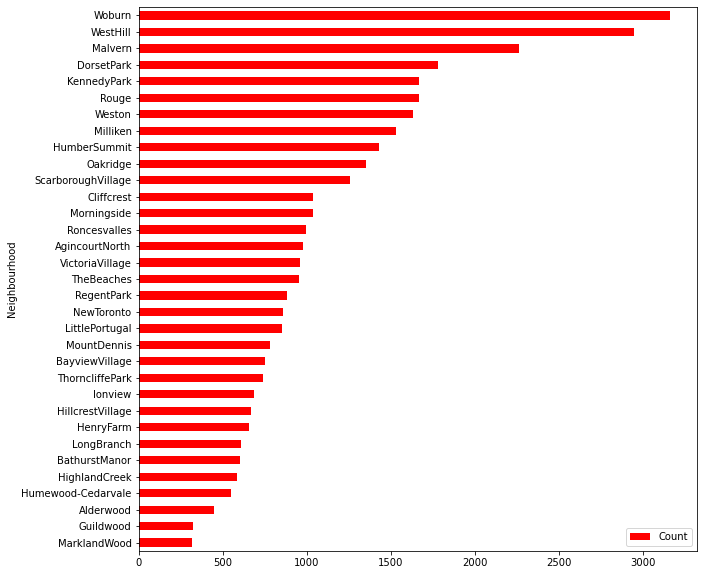

In [118]:
# Plots horizontal bar chart to show visualization of total crime count per neighbourhood highest to lowest.
crimetype_data2.sort_values('Count', inplace=True)
crimetype_data2.plot(x='Neighbourhood', y='Count', kind='barh', figsize=(10, 10), color='red')

In [119]:
# Left join df_TO_Crime and crimetype_data2. Now crime records include postal code, borough and neighbourhood information.
df_TO2 = pd.merge(df_TO_Location, crimetype_data2, on="Neighbourhood", how='left')

In [120]:
# Drops missing values in df_TO2 dataframe.
df_TO2 = df_TO2.dropna()

In [121]:
df_TO2.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Count
1,M4A,North York,VictoriaVillage,43.725882,-79.315572,960.0
2,M5A,Downtown Toronto,RegentPark,43.654260,-79.360636,882.0
9,M1B,Scarborough,Malvern,43.806686,-79.194353,2258.0
11,M1B,Scarborough,Rouge,43.806686,-79.194353,1664.0
25,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,548.0


In [122]:
# These columns are dropped to add cluster labels
df_TO2.drop('Borough', axis= 1, inplace= True)
df_TO2.drop('Neighbourhood', axis= 1, inplace= True)
df_TO2.drop('Postal Code', axis= 1, inplace= True)

In [123]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

<h2> Finding Optimal Number of Clusters using Elbow Plot <h2>

In [124]:
elbow = []
for k in range(1,len(df_TO2)):
    km = KMeans(n_clusters = k, random_state = 0).fit(df_TO2)
    elbow.append(km.inertia_)

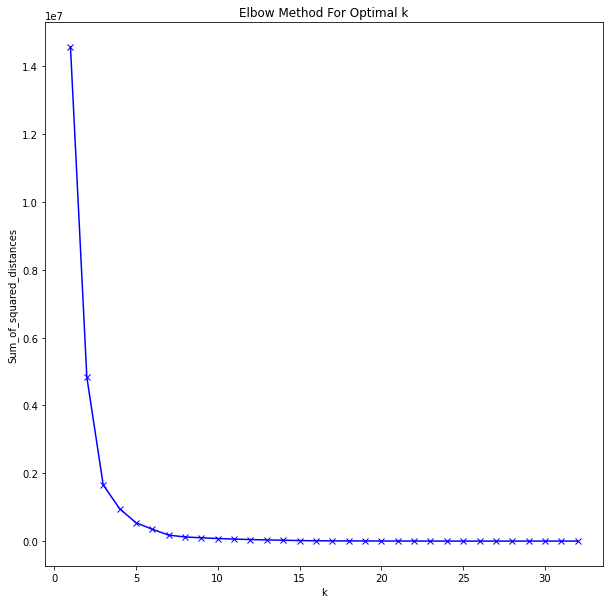

In [125]:
K = range(1,len(df_TO2))
plt.figure(figsize =(10,10))
plt.plot(K,  elbow,'bx-')
plt.xlabel('k')  
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [126]:
elbow2 = elbow[0:10]

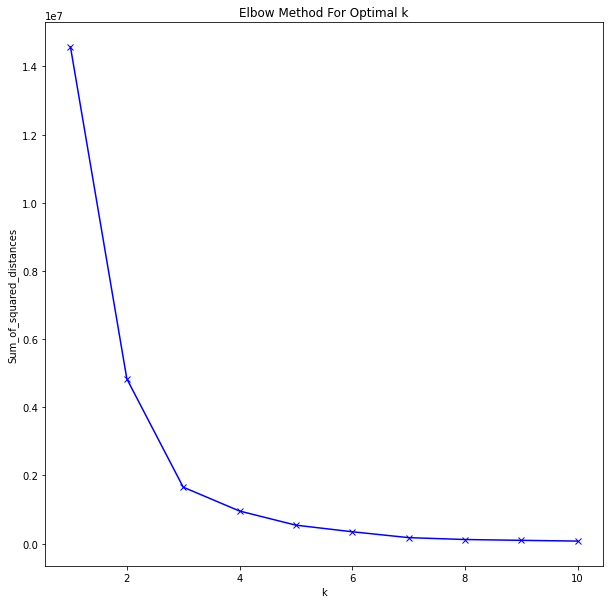

In [127]:
# Indicates the optimal number of clusters is 3.
K = range(1,11)
plt.figure(figsize =(10, 10))
plt.plot(K,  elbow2,'bx-')
plt.xlabel('k')  
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [128]:
# 3 clusters are made to represent high, medium and low level of crime.
cluster_num = 3
TO_kmeans = KMeans(n_clusters = cluster_num, random_state = 0).fit(df_TO2)

In [129]:
df_TO2.insert(0,'Cluster_Labels', TO_kmeans.labels_)

In [130]:
df_TO2.head(10)

,Cluster_Labels,Latitude,Longitude,Count
1,0,43.725882,-79.315572,960.0
2,0,43.654260,-79.360636,882.0
9,2,43.806686,-79.194353,2258.0
11,1,43.806686,-79.194353,1664.0
25,0,43.693781,-79.428191,548.0
27,0,43.784535,-79.160497,583.0
31,0,43.643515,-79.577201,318.0
32,0,43.763573,-79.188711,324.0
33,0,43.676357,-79.293031,953.0
36,2,43.770992,-79.216917,3158.0


In [131]:
# Left join df_TO_Location and df_TO2. Now crime records include location information again.
df_TO_cluster = pd.merge(df_TO_Location, df_TO2, on="Longitude", how='left')

In [132]:
df_TO_cluster

,Postal Code,Borough,Neighbourhood,Latitude_x,Longitude,Cluster_Labels,Latitude_y,Count
0,M3A,North York,Parkwoods,43.753259,-79.329656,NaN,NaN,NaN
1,M4A,North York,VictoriaVillage,43.725882,-79.315572,0.0,43.725882,960.0
2,M5A,Downtown Toronto,RegentPark,43.654260,-79.360636,0.0,43.654260,882.0
3,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636,0.0,43.654260,882.0
4,M6A,North York,LawrenceManor,43.718518,-79.464763,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
234,M8Z,Etobicoke,MimicoNW,43.628841,-79.520999,NaN,NaN,NaN
235,M8Z,Etobicoke,TheQueenswayWest,43.628841,-79.520999,NaN,NaN,NaN
236,M8Z,Etobicoke,SouthofBloor,43.628841,-79.520999,NaN,NaN,NaN
237,M8Z,Etobicoke,KingswayParkSouthWest,43.628841,-79.520999,NaN,NaN,NaN


In [133]:
# Drops missing values in df_TO_cluster dataframe.
df_TO_cluster = df_TO_cluster.dropna()

In [134]:
# Removes duplicate latitude column.
df_TO_cluster.drop('Latitude_y', axis= 1, inplace= True)
df_TO_cluster = df_TO_cluster.rename(columns={"Latitude_x": "Latitude"})

In [135]:
df_TO_cluster

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster_Labels,Count
1,M4A,North York,VictoriaVillage,43.725882,-79.315572,0.0,960.0
2,M5A,Downtown Toronto,RegentPark,43.654260,-79.360636,0.0,882.0
3,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636,0.0,882.0
9,M1B,Scarborough,Malvern,43.806686,-79.194353,2.0,2258.0
10,M1B,Scarborough,Malvern,43.806686,-79.194353,1.0,1664.0
...,...,...,...,...,...,...,...
198,M8V,Etobicoke,HumberBayShores,43.605647,-79.501321,0.0,856.0
211,M8W,Etobicoke,Alderwood,43.602414,-79.543484,0.0,451.0
212,M8W,Etobicoke,Alderwood,43.602414,-79.543484,0.0,611.0
213,M8W,Etobicoke,LongBranch,43.602414,-79.543484,0.0,451.0


<h2> Toronto Crime Cluster Map <h2>

In [136]:
# Creates cluster map.
cluster_map = folium.Map(location = [latitude, longitude], zoom_start = 11)
for lat, lng, neighbourhood, crime, cluster in zip(df_TO_cluster['Latitude'], df_TO_cluster['Longitude'], df_TO_cluster['Neighbourhood'], df_TO_cluster['Count'], df_TO_cluster['Cluster_Labels']):
    label = 'Cluster #: {}, Neighbourhood: {}, Crime: {} incidents'.format(cluster,neighbourhood, crime)
    label = folium.Popup(label, parse_html = True)
    if cluster == 0:
        color="green" # low crime level
    elif cluster == 1:
        color = "red" # high crime level
    else: 
        color="yellow" # medium crime level
    folium.CircleMarker([lat, lng], 
                        radius = 4, 
                        popup = label, 
                        color = color,
                        fill = True, 
                        fill_opacity = 0.6, 
                        parse_html = False).add_to(cluster_map)
cluster_map

<h2> Distribution of neighbourhoods by crime level <h2>

([<matplotlib.axis.XTick at 0xdca8ec8>,
 [Text(0, 0, 'Low Crime Level'),
  Text(1, 0, 'Medium Crime Level'),
  Text(2, 0, 'High Crime Level')])

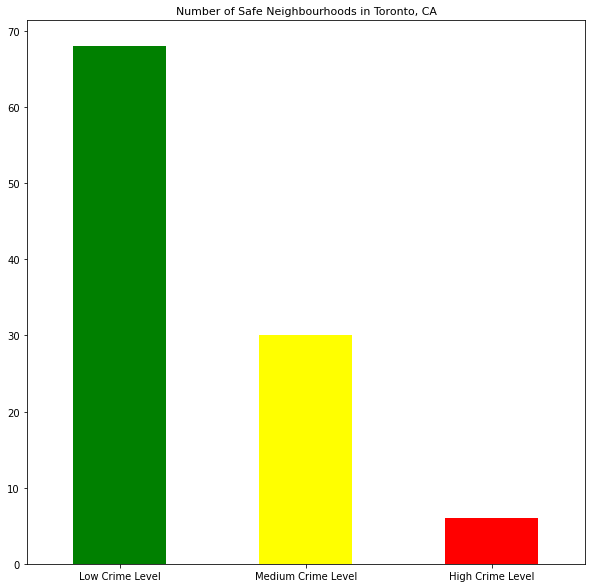

In [137]:
# Bar plot of clustered neighbourhoods
df_TO_cluster['Cluster_Labels'].value_counts().plot(kind = 'bar', color =['green', 'yellow', 'red'], figsize =(10, 10))
plt.title('Number of Safe Neighbourhoods in Toronto, CA', fontsize = 11)
plt.xticks(np.arange(3), ('Low Crime Level', 'Medium Crime Level', 'High Crime Level'), rotation = 'horizontal')

Note: Most neighbourhoods in Toronto are classified under the low crime level cluster.

<h1> Regression Analysis for Crime Prediction <h1>

In [138]:
# Crime_Type will be predicted using the other variables available in below dataframe.
df_summary

,Neighbourhood,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Apartment,Commercial,House,Other,Outside
0,AgincourtNorth,0.377937,0.162411,0.280899,0.151175,0.027579,0.066394,0.147089,0.453524,0.076609,0.256384
1,AgincourtSouth-MalvernWest,0.422853,0.136099,0.295488,0.101164,0.044396,0.109170,0.346434,0.237991,0.069869,0.236536
2,Alderwood,0.376940,0.192905,0.274945,0.079823,0.075388,0.115299,0.279379,0.283814,0.059867,0.261641
3,Annex,0.510311,0.048120,0.294379,0.085321,0.061868,0.239790,0.296805,0.098261,0.169025,0.196118
4,Banbury-DonMills,0.405248,0.108844,0.361516,0.074830,0.049563,0.238095,0.188533,0.310010,0.079689,0.183673
...,...,...,...,...,...,...,...,...,...,...,...
135,Wychwood,0.531884,0.107246,0.249275,0.095652,0.015942,0.176812,0.220290,0.181159,0.121739,0.300000
136,Yonge-Eglinton,0.564586,0.062409,0.191582,0.148041,0.033382,0.119013,0.246734,0.111756,0.238026,0.284470
137,Yonge-St.Clair,0.479412,0.070588,0.302941,0.082353,0.064706,0.367647,0.194118,0.135294,0.055882,0.247059
138,YorkUniversityHeights,0.504414,0.156563,0.167746,0.116539,0.054738,0.233667,0.287816,0.090642,0.109182,0.278693


In [139]:
from sklearn.model_selection import train_test_split

from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

<h2> Data Manipulation for Regression Analysis <h2>

In [140]:
# Made a separate excel worksheet to list neighbourhoods and their respective IDs based on the same IDs provided in the crime dataset.
Neighbourhood_ID = client.open("TO_Neighbourhood_Data").worksheet('TO_Neighbourhoods_ID') # Indicates the worksheet name to be opened
TO_Neighbourhood_ID = Neighbourhood_ID.get_all_records()

# Imports Google sheet as pandas dataframe; 0 indicates first row/column
TO_Neighbourhood_ID = pd.DataFrame(TO_Neighbourhood_ID[0:], columns=TO_Neighbourhood_ID[0])

In [141]:
TO_Neighbourhood_ID

,Neighbourhood_ID,Neighbourhood
0,1,WestHumber-Clairville
1,2,MountOlive-Silverstone-Jamestown
2,3,Thistletown-BeaumondHeights
3,4,Rexdale-Kipling
4,5,Elms-OldRexdale
...,...,...
135,136,WestHill
136,137,Woburn
137,138,EglintonEast
138,139,ScarboroughVillage


In [142]:
df_summary2 = pd.merge(df_summary, TO_Neighbourhood_ID, on="Neighbourhood", how='left')

In [143]:
df_summary2 = df_summary2.dropna()

In [144]:
df_summary2.drop('Neighbourhood', axis= 1, inplace= True)

In [145]:
df_summary2.head()

,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Apartment,Commercial,House,Other,Outside,Neighbourhood_ID
0,0.377937,0.162411,0.280899,0.151175,0.027579,0.066394,0.147089,0.453524,0.076609,0.256384,129
1,0.422853,0.136099,0.295488,0.101164,0.044396,0.109170,0.346434,0.237991,0.069869,0.236536,128
2,0.376940,0.192905,0.274945,0.079823,0.075388,0.115299,0.279379,0.283814,0.059867,0.261641,20
3,0.510311,0.048120,0.294379,0.085321,0.061868,0.239790,0.296805,0.098261,0.169025,0.196118,95
4,0.405248,0.108844,0.361516,0.074830,0.049563,0.238095,0.188533,0.310010,0.079689,0.183673,42


In [146]:
target_column = df_summary2['Neighbourhood_ID'] 
predictors = list(set(list(df_summary2.columns))-set(target_column)) # Includes all columns as predictors except Crime_Type column
df_summary2[predictors] = df_summary2[predictors]/df_summary2[predictors].max()
df_summary2.describe()

,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Apartment,Commercial,House,Other,Outside,Neighbourhood_ID
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,0.676504,0.312273,0.438580,0.556955,0.416858,0.401485,0.395147,0.359412,0.298733,0.588739,0.503571
std,0.148622,0.170536,0.161516,0.165290,0.184728,0.194345,0.189235,0.217888,0.141546,0.141209,0.289704
min,0.268528,0.074974,0.148091,0.202732,0.114901,0.062664,0.085863,0.004679,0.111165,0.241114,0.007143
25%,0.598812,0.177323,0.320503,0.436192,0.276663,0.255470,0.254654,0.211318,0.204295,0.495982,0.255357
50%,0.693193,0.271001,0.421989,0.562689,0.390575,0.390040,0.365587,0.303586,0.255267,0.574760,0.503571
75%,0.785117,0.412508,0.523598,0.657275,0.540203,0.534697,0.483052,0.477900,0.363420,0.690985,0.751786
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [147]:
# Data Splitting
X = df_summary2[predictors].values
y = target_column.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
print(X_train.shape); print(X_test.shape)

(98, 11)
(42, 11)


<h2> Linear Regression <h2>

In [148]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [149]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1)

In [150]:
# Model evaluation metrics - training set
pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr))) # Mean Squared Error
print(r2_score(y_train, pred_train_lr)) # R-squared

# Model evaluation metrics - testing set
pred_test_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr)))  # Mean Squared Error
print(r2_score(y_test, pred_test_lr)) # R-squared

4.838445560335605e-14
1.0
5.262927794917022e-14
1.0


The above output shows that the RMSE, one of the two evaluation metrics, is 5.46 for train data and 6.75 for test data. The R-squared value is 100 percent for train data and 100 percent for test data, which is a good performance.

<h2> Ridge Regression <h2>

In [151]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

0.0652185639924553
0.9999970408780695
0.0837972067398663
0.9999966368953498


The above output shows that the RMSE and R-squared values for the Ridge Regression model on the training data is 0.07 and 99.99 percent, respectively. For the test data, the result for these metrics is 0.09 and 99.99 percent, respectively.

<h2> Lasso Regression <h2>

In [152]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

0.03692650747870371
0.9999990513699798
0.044539516903252176
0.9999990498934737


The above output shows that the RMSE and R-squared values for the Lasso Regression model on the training data is 0.04 and 99.99 percent, respectively.

The results for these metrics on the test data is 0.04 and 99.99 percent, respectively. Lasso Regression can also be used for feature selection because the coeﬃcients of less important features are reduced to zero.

<h2> ElasticNet Regression <h2>

In [153]:
#Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

2.658282738136967
0.9950838770179584
3.3771480229452955
0.9945376252742747


The above output shows that the RMSE and R-squared value for the ElasticNet Regression model on the training data is 2.68 and 99.50 percent, respectively. The results for these metrics on the test data is 3.43 and 99.4 percent, respectively.

Note: The Lasso regression model performed the best as it had the lowest RMSE relative to the other regression models.